In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
data = pd.read_csv("2008_births.csv")
data


In [ ]:
import numpy as np 
from sklearn.model_selection import train_test_split

In [ ]:
#birthweight is what we want to predict - change this to single target 
birth_weight = data[['BPOUND', 'BOUNCE']] 

In [ ]:
#PCA might be a good technique to select predictors 

#note that PCA performs best when data is normalized (range b/w 0 and 1)

#It is possible to use categorical and continuous predictors 
#for a regression problem. My understanding is you need to make 
#dummy variables for the binary predictors. 

#Variables that we will need to deal with: 
# BDATE, HISPMOM, HISPDAD

In [ ]:
#Attempting PCA on data
#for now I drop the BDATE, HISPMOM AND HISPDAD
data_drop = data.drop(["BDATE", "HISPMOM", "HISPDAD", "BOUNCE", "BPOUND"], axis = 1) #axis = 1 means to drop column not row

In [ ]:
#get a list of columns in pandas object 
names_of_data = data_drop.columns.tolist()

#shuffle = false prevents data split being different everytime
X_train, X_test, y_train, y_test = train_test_split(data_drop, birth_weight, test_size = 0.2, shuffle = False)

#split test into validate and test, again making sure the data is always the same for consistency
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.25, shuffle = False)

#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#running the actual PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#relief f algorithm - sorting features 

In [ ]:
explained_variance = pca.explained_variance_ratio_
print(len(explained_variance))
print(explained_variance)

120
[3.89856404e-02 3.41089470e-02 3.05310536e-02 2.86690661e-02
 2.39828710e-02 2.07124228e-02 1.81565355e-02 1.70798239e-02
 1.68763289e-02 1.59961073e-02 1.56220702e-02 1.35585642e-02
 1.30251204e-02 1.13087563e-02 1.10457470e-02 1.09427186e-02
 1.06522571e-02 1.03091115e-02 1.02034145e-02 1.01603763e-02
 9.98586972e-03 9.86404012e-03 9.78778404e-03 9.61165628e-03
 9.46902421e-03 9.40630729e-03 9.25092446e-03 9.20797437e-03
 9.16882901e-03 9.11728971e-03 9.08471022e-03 9.05880935e-03
 8.91090184e-03 8.85632587e-03 8.83902308e-03 8.82366452e-03
 8.73228213e-03 8.70972804e-03 8.64475483e-03 8.63888132e-03
 8.60300393e-03 8.57402898e-03 8.54542908e-03 8.51710741e-03
 8.50298288e-03 8.46111398e-03 8.42122923e-03 8.39505222e-03
 8.37548109e-03 8.34046815e-03 8.29732609e-03 8.28947627e-03
 8.24895028e-03 8.22904830e-03 8.20238682e-03 8.12690154e-03
 8.11341630e-03 8.08291392e-03 8.07851589e-03 8.03763212e-03
 8.01473052e-03 7.96613523e-03 7.90999598e-03 7.89944166e-03
 7.83600377e-03 7.82

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#Explained variance prints the variance each principal component contributes.
#As we can see, the last 5 contribute very little (maybe we can get rid of?)

#We also want to check for linearity between the input predictors and the output 
#If there is high colinearity, then we want to use ridge regression - A variant of lin regression that has regulatization

#Correlation indicates strength and direction of a linear relationship. let's use this on the predictors 

## Linear Regression Model

In [ ]:
#importing the linear regression library from sklearn 
from sklearn.linear_model import LinearRegression

In [ ]:
#initalizing 
reg0 = LinearRegression()

In [ ]:
#fitting the data to train the model
reg0.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# R^2 Score to determine the varaiance   
reg0.score(X_test,y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


-1.1539563533533953e+24

Text(0, 0.5, 'expected')

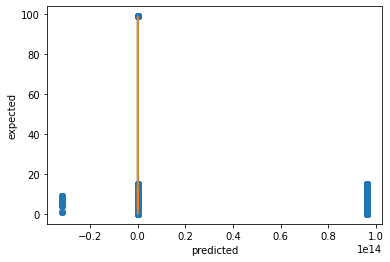

In [ ]:
#plot of unity where the x axis is the predicted output and y-axis is the expected value 
#this is similar to the confusion matrix as we want as the points to fit y=x.

y_pred = reg0.predict(X_test)
plt.scatter(y_pred, y_test)
plt.plot(y_test,y_test)
plt.xlabel("predicted")
plt.ylabel("expected")


In [ ]:
#calculating the mean square error which is quite high for this model, suggesting that the data is not linear 
mean_squared_error(y_pred=y_pred,y_true=y_test)

1.7088583595092018e+25

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#initalizing random forest with 50 estimaters and max_depth of 5 to increase the accuracy while making sure to not over-fit the data 
reg = RandomForestRegressor(n_estimators=500, max_depth=5, random_state=33, n_jobs=6)
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

In [ ]:
#plot of unity 
y_pred = reg.predict(X_test)
plt.scatter(y_pred, y_test)
plt.plot(y_test,y_test)
plt.xlabel("predicted")
plt.ylabel("expected")

In [ ]:
mean_squared_error(y_pred=reg.predict(X_test),y_true=y_test)

[link text](https://)## Deep Neural Network

In [ ]:
#Made my own model using back propagation 
#Importing relevant libraries for model creation and training 
#followed this tutoial to implement this model: https://www.tensorflow.org/tutorials/keras/regression
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
#initalize a normalizer to scale the input data
normalizer = preprocessing.Normalization()


In [ ]:
#created a model with 5 hidden layers using sigmoid activation because Relu could go to infinity 
model = keras.Sequential([
                          normalizer,
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(2)
])
# want the model to minimize mean sqaure error, and set the optimizer to adam as it is the most efficient for this case
model.compile(loss='mean_squared_error',
            optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
#running 20 epochs to minimize overfitting 
history = model.fit(
    X_train, y_train,
    validation_split=0.2, #20% validation split for back propogation 
    verbose=2, epochs=20)

In [ ]:
#getting the predictions of the model
y_pred = model.predict(X_test)

In [ ]:
#calculating the mean sqaure error. This is significantly lower compared to the other two models implemented 
mean_squared_error(y_pred=y_pred,y_true=y_test)

In [ ]:
plt.scatter(y_pred, y_test)
plt.plot(y_test,y_test,'red')